## 가입개월수
이전에 수행한 상관분석 결과, '이탈여부'는 '가입개월수'와 -0.4의 음의 상관관계를 보였다.  
시각화 결과에서도, 가입개월수가 증가할수록 이탈률이 감소하는 것을 볼 수 있었다.  
이는 '가입개월수'가 늘어날수록 이탈 가능성이 낮아진다는 것을 의미한다.  
따라서 가입개월수와 관련이 상관이 높은 변수를 찾아서, 이를 기반으로 맞춤형 프로모션을 진행한다면 이탈률을 낮출 수 있을 것으로 기대된다.

### 전체 변수들 중 분석해 볼 만한 가입개월수와 상관이 높은 변수 선정
- 계약기간유형 : 2년 > 1년 > 월 결제 순으로 가입개월수가 많을 것이다.
- 가입혜택, 부가서비스여부, 프리미엄기술지원여부 : 서비스/지원을 받고 있는 고객의 경우 서비스/지원에 만족했다면 가입개월수가 많을 것이다.
- 친구추천여부, 친구추천횟수 : 추천을 많이 했다면 본인 스스로도 오래 사용했을 것이므로, 가입개월수가 많을 것이다.
- 만족도 점수 : 만족도 점수가 높으면 가입개월수가 많을 것이다.

- 원래 데이터셋 상관분석 결과 가입개월수와 상관이 높은 변수
  : 배우자여부, 복수회선여부, 온라인보안서비스여부, 온라인백업서비스여부, 기기보호서비스여부, 기술지원서비스여부, TV스트리밍이용여부, 총요금
- 총요금에는 가입개월수가 계산되기 때문에 제하면 크게 배우자여부, 복수회선여부, 부가서비스여부로 볼 수 있다.
  각 변수들은 가입개월수와 모두 양의 상관관계를 가진다.
- 이는 배우자가 있을 때, 복수회선을 사용할 때, 부가서비스를 사용할 때 이탈 가능성이 높다는 것을 시사하기 때문에, 이러한 변수들에 맞춘 새로운 맞춤 프로모션을 적용하기에는 어렵다고 사료되어진다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 기본 테마 설정
# https://coldbrown.co.kr/2023/07/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EC%8B%A4%EC%A0%84%ED%8E%B8-08-seaborn-sns-set%EC%9D%84-%ED%86%B5%ED%95%B4-%EC%8A%A4%ED%83%80%EC%9D%BC-%EC%84%A4%EC%A0%95%ED%95%98%EA%B8%B0/
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False


# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats

In [2]:
## 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
## 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df):
  print(f'데이터셋 크기: {df.shape}')                                # 데이터프레임의 전체 크기(행, 열) 출력

  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])         # 각 피처의 데이터 타입을 가져와 데이터프레임으로 생성
  summary = summary.reset_index()                                    # 인덱스를 초기화하여 컬럼으로 변환
  summary = summary.rename(columns={'index':'피처'})                 # 'index' 컬럼명을 '피처'로 변경

  summary['결측값 개수'] = df.isnull().sum().values                 # 각 피처의 결측값(null) 개수 계산
  summary['고유값 개수'] = df.nunique().values                      # 각 피처의 고유값 개수 계산

  summary['첫 번째 값'] = df.iloc[0].values                          # 각 피처의 첫 번째 샘플 값
  summary['두 번째 값'] = df.iloc[1].values                          # 각 피처의 두 번째 샘플 값
  summary['세 번째 값'] = df.iloc[2].values                          # 각 피처의 세 번째 샘플 값

  return summary                                                     # 요약 테이블 반환

In [3]:
# 기존에 분석했던 것들 그대로 가져옴
tel = pd.read_csv('data/tel_data.csv', index_col=0)

In [4]:
categorical_df = tel.select_dtypes(include='object')
categorical_df.drop(columns = '고객ID', inplace = True)
categorical_df = pd.get_dummies(categorical_df)
categorical_df['이탈여부'] = tel['이탈여부']
categorical_df['가입개월수'] = tel['가입개월수']
categorical_df

,인터넷서비스유형_DSL,인터넷서비스유형_False,인터넷서비스유형_Fiber optic,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year,결제방법_Bank transfer (automatic),결제방법_Credit card (automatic),결제방법_Electronic check,결제방법_Mailed check,이탈여부,가입개월수
0,True,False,False,True,False,False,False,False,True,False,False,1
1,True,False,False,False,True,False,False,False,False,True,False,34
2,True,False,False,True,False,False,False,False,False,True,True,2
3,True,False,False,False,True,False,True,False,False,False,False,45
4,False,False,True,True,False,False,False,False,True,False,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,False,False,False,True,False,False,False,False,True,False,24
7039,False,False,True,False,True,False,False,True,False,False,False,72
7040,True,False,False,True,False,False,False,False,True,False,False,11
7041,False,False,True,True,False,False,False,False,False,True,True,4


In [5]:
correlation_matrix = categorical_df.corr()
print(correlation_matrix)

                                인터넷서비스유형_DSL  인터넷서비스유형_False  \
인터넷서비스유형_DSL                        1.000000       -0.380635   
인터넷서비스유형_False                     -0.380635        1.000000   
인터넷서비스유형_Fiber optic               -0.640987       -0.465793   
계약기간유형_Month-to-month              -0.065509       -0.218639   
계약기간유형_One year                     0.046795        0.038004   
계약기간유형_Two year                     0.031714        0.218278   
결제방법_Bank transfer (automatic)      0.025476       -0.002113   
결제방법_Credit card (automatic)        0.051438        0.001030   
결제방법_Electronic check              -0.104418       -0.284917   
결제방법_Mailed check                   0.041899        0.321361   
이탈여부                               -0.124214       -0.227890   
가입개월수                               0.013274       -0.039062   

                                인터넷서비스유형_Fiber optic  계약기간유형_Month-to-month  \
인터넷서비스유형_DSL                               -0.640987              -0.065509   
인터넷서비스유형_

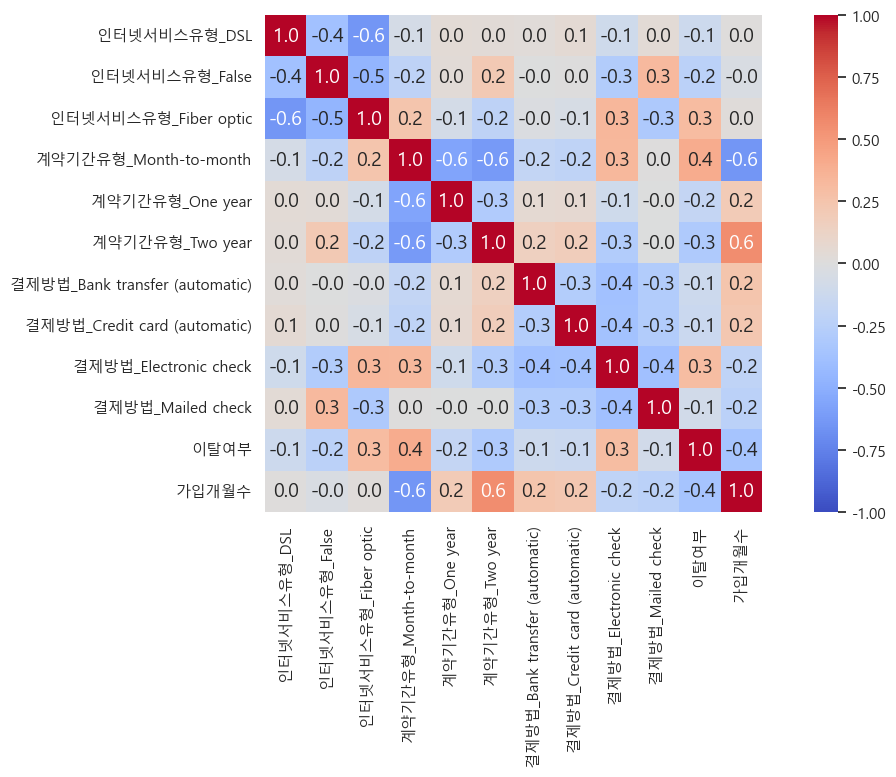

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- 계약기간유형_Month-to-month와 가입개월수는 -0.6,
- 계약기간유형_Two_year과 가입개월수는 0.6의 상관관계를 갖는 것으로 나타났다.

### 추가 데이터셋 변수와 가입개월수 비교
- 불러오기, 컬럼 정리하기

In [7]:
# 상현님이 작업한 demographics
demo = pd.read_csv('data/demographics_SH.csv')

In [8]:
demo

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수
0,8779-QRDMV,True,78,False,True,False,False,0
1,7495-OOKFY,False,74,False,True,True,True,1
2,1658-BYGOY,True,71,False,True,False,True,3
3,4598-XLKNJ,False,78,False,True,True,True,1
4,4846-WHAFZ,False,80,False,True,True,True,1
...,...,...,...,...,...,...,...,...
7038,2569-WGERO,False,30,False,False,False,False,0
7039,6840-RESVB,True,38,False,False,True,True,2
7040,2234-XADUH,False,30,False,False,True,True,2
7041,4801-JZAZL,False,32,False,False,True,True,2


In [9]:
# 민재님이 작업한 status
status = pd.read_csv('data/churn_status_preprocessing.csv')

In [10]:
status

,고객ID,분기,고객만족도점수,현재고객상태,이탈여부,이탈위험점수,고객생애가치,이탈유형,이탈사유
0,8779-QRDMV,Q3,3,Churned,True,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Q3,3,Churned,True,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Q3,2,Churned,True,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Q3,2,Churned,True,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Q3,2,Churned,True,67,2793,Price,Extra data charges
...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Q3,5,Stayed,False,45,5306,NaN,NaN
7039,6840-RESVB,Q3,3,Stayed,False,59,2140,NaN,NaN
7040,2234-XADUH,Q3,4,Stayed,False,71,5560,NaN,NaN
7041,4801-JZAZL,Q3,4,Stayed,False,59,2793,NaN,NaN


In [11]:
# 필요없는 컬럼 제거
status = status.drop(['분기','이탈위험점수','이탈유형','이탈사유'], axis=1)

- **demographics, status의 컬럼들과 가입개월수 비교**

In [12]:
demo_stat = pd.merge(demo, status, on='고객ID', how='outer')

In [13]:
demo_stat

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,고객만족도점수,현재고객상태,이탈여부,고객생애가치
0,0002-ORFBO,False,37,False,False,True,False,0,3,Stayed,False,2205
1,0003-MKNFE,True,46,False,False,False,False,0,5,Stayed,False,5414
2,0004-TLHLJ,True,50,False,False,False,False,0,1,Churned,True,4479
3,0011-IGKFF,True,78,False,True,True,False,0,1,Churned,True,3714
4,0013-EXCHZ,False,75,False,True,True,False,0,1,Churned,True,3464
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,False,20,True,False,False,False,0,4,Stayed,False,3161
7039,9992-RRAMN,True,40,False,False,True,False,0,1,Churned,True,5248
7040,9992-UJOEL,True,22,True,False,False,False,0,5,Joined,False,5870
7041,9993-LHIEB,True,21,True,False,True,False,0,3,Stayed,False,4792


In [14]:
# 가입개월수와 비교

# tel에서 '고객ID'와 '가입개월수'만 선택
tel_subset = tel[['고객ID', '가입개월수']]

# demo_stat에 병합
demo_stat = pd.merge(demo_stat, tel_subset, on='고객ID', how='left')

In [15]:
demo_stat

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,고객만족도점수,현재고객상태,이탈여부,고객생애가치,가입개월수
0,0002-ORFBO,False,37,False,False,True,False,0,3,Stayed,False,2205,9
1,0003-MKNFE,True,46,False,False,False,False,0,5,Stayed,False,5414,9
2,0004-TLHLJ,True,50,False,False,False,False,0,1,Churned,True,4479,4
3,0011-IGKFF,True,78,False,True,True,False,0,1,Churned,True,3714,13
4,0013-EXCHZ,False,75,False,True,True,False,0,1,Churned,True,3464,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,False,20,True,False,False,False,0,4,Stayed,False,3161,13
7039,9992-RRAMN,True,40,False,False,True,False,0,1,Churned,True,5248,22
7040,9992-UJOEL,True,22,True,False,False,False,0,5,Joined,False,5870,2
7041,9993-LHIEB,True,21,True,False,True,False,0,3,Stayed,False,4792,67


In [16]:
numeric_df = demo_stat.select_dtypes(include=['number', 'bool'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

               성별        나이   30세미만여부     고령자여부      결혼여부    부양가족여부     부양가족수  \
성별       1.000000  0.002186 -0.002962 -0.001874 -0.001808  0.005229  0.005840   
나이       0.002186  1.000000 -0.672651  0.681507 -0.003666 -0.125450 -0.119000   
30세미만여부 -0.002962 -0.672651  1.000000 -0.219216  0.015140  0.041651  0.036340   
고령자여부   -0.001874  0.681507 -0.219216  1.000000  0.016479 -0.174396 -0.168152   
결혼여부    -0.001808 -0.003666  0.015140  0.016479  1.000000  0.363430  0.324205   
부양가족여부   0.005229 -0.125450  0.041651 -0.174396  0.363430  1.000000  0.888234   
부양가족수    0.005840 -0.119000  0.036340 -0.168152  0.324205  0.888234  1.000000   
고객만족도점수 -0.003948 -0.085170  0.041993 -0.116601  0.077743  0.168359  0.152873   
이탈여부    -0.008612  0.115760 -0.054604  0.150889 -0.150448 -0.248542 -0.218780   
고객생애가치  -0.006851 -0.001826 -0.008363 -0.003167  0.137859  0.058222  0.049611   
가입개월수    0.005106  0.010202 -0.000579  0.016567  0.379697  0.131376  0.107689   

          고객만족도점수      이탈여부

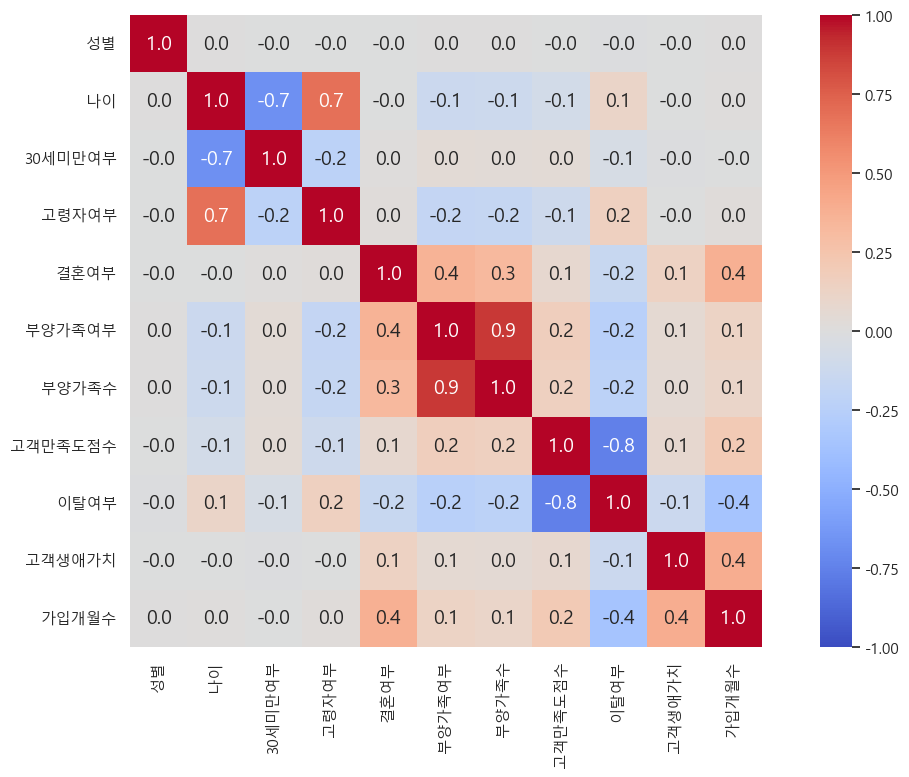

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- 결혼여부, 고객생애가치 이외에 특별한 연관성 보이지 않았다.
- 결혼여부는 이전 데이터셋에서 다루었고, 고객생애가치는 계산에 지속기간이 들어가므로 연관이 높을 수밖에 없다.
  

In [18]:
# 라희님 작업한 services
services = pd.read_csv('data/services_data.csv', encoding='euc-kr')
services

,Unnamed: 0,고객ID,분기,친구추천여부,친구추천횟수,가입개월수2,가입혜택,전화서비스가입여부,장거리통화요금,복수회선여부,...,계약기간유형,전자청구서이용여부,월요금,총요금,총환불액,총초과데이터요금,총장거리통화요금,총납부금,결제방법,이탈여부
0,0,8779-QRDMV,Q3,False,0,1,No,False,0.00,False,...,Month-to-Month,True,39.65,39.65,0.00,20,0.00,59.65,Electronic check,True
1,1,7495-OOKFY,Q3,True,1,8,Offer E,True,48.85,True,...,Month-to-Month,True,80.65,633.30,0.00,0,390.80,1024.10,Credit card (automatic),True
2,2,1658-BYGOY,Q3,False,0,18,Offer D,True,11.33,True,...,Month-to-Month,True,95.45,1752.55,45.61,0,203.94,1910.88,Electronic check,True
3,3,4598-XLKNJ,Q3,True,1,25,Offer C,True,19.76,False,...,Month-to-Month,True,98.50,2514.50,13.43,0,494.00,2995.07,Electronic check,True
4,4,4846-WHAFZ,Q3,True,1,37,Offer C,True,6.33,True,...,Month-to-Month,True,76.50,2868.15,0.00,0,234.21,3102.36,Electronic check,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,2569-WGERO,Q3,False,0,72,No,True,22.77,False,...,Two Year,True,21.15,1419.40,19.31,0,1639.44,3039.53,Bank transfer (automatic),False
7039,7039,6840-RESVB,Q3,True,1,24,Offer C,True,36.05,True,...,One Year,True,84.80,1990.50,48.23,0,865.20,2807.47,Mailed check,False
7040,7040,2234-XADUH,Q3,True,4,72,No,True,29.66,True,...,One Year,True,103.20,7362.90,45.38,0,2135.52,9453.04,Credit card (automatic),False
7041,7041,4801-JZAZL,Q3,True,1,11,No,False,0.00,False,...,Month-to-Month,True,29.60,346.45,27.24,0,0.00,319.21,Electronic check,False


In [19]:
# 필요없는 컬럼 제거
services = services.drop(['Unnamed: 0', '분기', '가입개월수2', '복수회선여부', '온라인보안서비스여부', '온라인백업서비스여부', '기기보호서비스여부', 'TV스트리밍이용여부', '영화스트리밍이용여부', '계약기간유형', '월요금', '총요금', '결제방법', '이탈여부'], axis=1)
services

,고객ID,친구추천여부,친구추천횟수,가입혜택,전화서비스가입여부,장거리통화요금,월평균다운로드용량(GB),프리미엄기술지원여부,음악스트리밍이용여부,무제한데이터이용여부,전자청구서이용여부,총환불액,총초과데이터요금,총장거리통화요금,총납부금
0,8779-QRDMV,False,0,No,False,0.00,8,False,False,False,True,0.00,20,0.00,59.65
1,7495-OOKFY,True,1,Offer E,True,48.85,17,False,False,True,True,0.00,0,390.80,1024.10
2,1658-BYGOY,False,0,Offer D,True,11.33,52,False,True,True,True,45.61,0,203.94,1910.88
3,4598-XLKNJ,True,1,Offer C,True,19.76,12,False,False,True,True,13.43,0,494.00,2995.07
4,4846-WHAFZ,True,1,Offer C,True,6.33,14,False,False,True,True,0.00,0,234.21,3102.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,False,0,No,True,22.77,0,False,False,False,True,19.31,0,1639.44,3039.53
7039,6840-RESVB,True,1,Offer C,True,36.05,24,True,True,True,True,48.23,0,865.20,2807.47
7040,2234-XADUH,True,4,No,True,29.66,59,False,True,True,True,45.38,0,2135.52,9453.04
7041,4801-JZAZL,True,1,No,False,0.00,17,False,False,True,True,27.24,0,0.00,319.21


- **services의 컬럼들과 가입개월수 비교**

In [20]:
# services에 병합
services = pd.merge(services, tel_subset, on='고객ID', how='left')
services

,고객ID,친구추천여부,친구추천횟수,가입혜택,전화서비스가입여부,장거리통화요금,월평균다운로드용량(GB),프리미엄기술지원여부,음악스트리밍이용여부,무제한데이터이용여부,전자청구서이용여부,총환불액,총초과데이터요금,총장거리통화요금,총납부금,가입개월수
0,8779-QRDMV,False,0,No,False,0.00,8,False,False,False,True,0.00,20,0.00,59.65,1
1,7495-OOKFY,True,1,Offer E,True,48.85,17,False,False,True,True,0.00,0,390.80,1024.10,8
2,1658-BYGOY,False,0,Offer D,True,11.33,52,False,True,True,True,45.61,0,203.94,1910.88,18
3,4598-XLKNJ,True,1,Offer C,True,19.76,12,False,False,True,True,13.43,0,494.00,2995.07,25
4,4846-WHAFZ,True,1,Offer C,True,6.33,14,False,False,True,True,0.00,0,234.21,3102.36,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,False,0,No,True,22.77,0,False,False,False,True,19.31,0,1639.44,3039.53,72
7039,6840-RESVB,True,1,Offer C,True,36.05,24,True,True,True,True,48.23,0,865.20,2807.47,24
7040,2234-XADUH,True,4,No,True,29.66,59,False,True,True,True,45.38,0,2135.52,9453.04,72
7041,4801-JZAZL,True,1,No,False,0.00,17,False,False,True,True,27.24,0,0.00,319.21,11


In [21]:
numeric_df_ser = services.select_dtypes(include=['number', 'bool'])
correlation_matrix_ser = numeric_df_ser.corr()
print(correlation_matrix_ser)

                 친구추천여부    친구추천횟수  전화서비스가입여부   장거리통화요금  월평균다운로드용량(GB)  \
친구추천여부         1.000000  0.708291   0.015418  0.008702       0.055003   
친구추천횟수         0.708291  1.000000   0.009947  0.006336       0.038575   
전화서비스가입여부      0.015418  0.009947   1.000000  0.486673      -0.102748   
장거리통화요금        0.008702  0.006336   0.486673  1.000000      -0.030455   
월평균다운로드용량(GB)  0.055003  0.038575  -0.102748 -0.030455       1.000000   
프리미엄기술지원여부     0.121772  0.107725  -0.096340 -0.048217       0.223924   
음악스트리밍이용여부     0.089917  0.051349  -0.039252  0.008044       0.323998   
무제한데이터이용여부     0.019014 -0.005813  -0.122395 -0.053273       0.395209   
전자청구서이용여부     -0.011095 -0.044888   0.016505  0.018673       0.142999   
총환불액           0.038250  0.024756   0.006331 -0.018644       0.002397   
총초과데이터요금       0.020150  0.000350  -0.030620  0.002414       0.088939   
총장거리통화요금       0.250769  0.216190   0.289728  0.599828       0.011373   
총납부금           0.314777  0.261853   0.174788  0.232

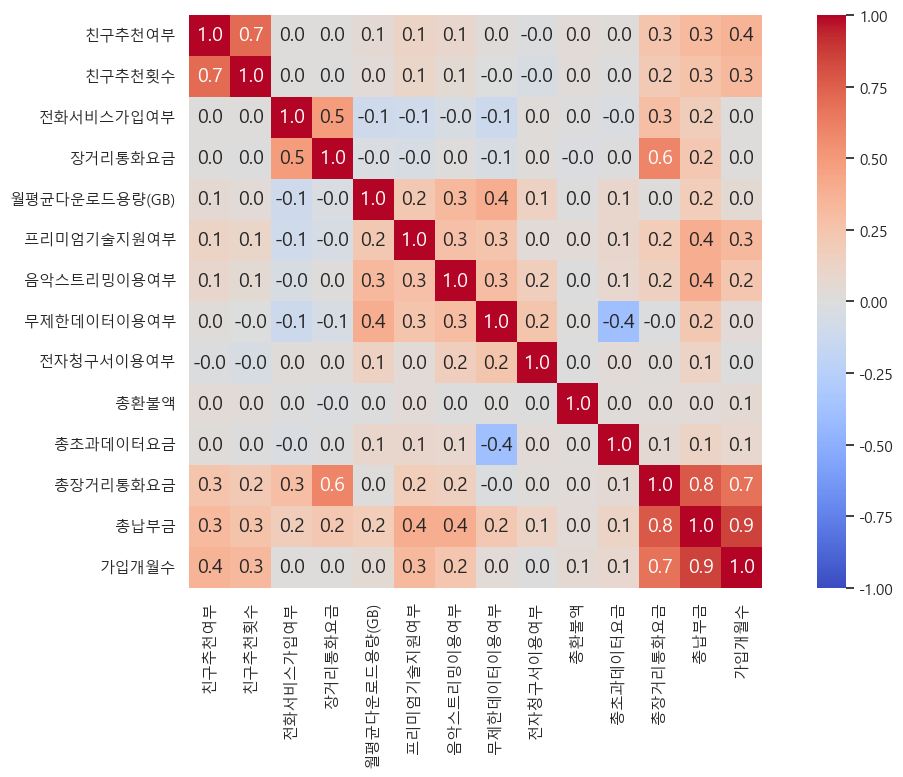

In [22]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_ser, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- 가입개월수는 **친구추천여부, 친구추천횟수**와 각각 0.4, 0.3으로 양의 상관관계를 갖는 것으로 확인되었다.
- 또한 **프리미엄기술지원여부**와도 0.3의 양의 상관관계를 갖는 것이 확인되었다. 프리미엄기술지원이 경쟁력이 있는 기술인 것으로 추측된다.
- 총장거리통화요금, 총납부금도 강한 상관관계를 보였으나, 이는 각 계산에 가입개월수가 들어가기 때문이므로 이후의 논의에서는 제하겠다.

In [23]:
categorical_df_ser = services.select_dtypes(include='object')
# categorical_df

In [24]:
categorical_df_ser.drop(columns = '고객ID', inplace = True)
categorical_df_ser['가입개월수'] = tel['가입개월수']
categorical_df_ser

,가입혜택,가입개월수
0,No,1
1,Offer E,34
2,Offer D,2
3,Offer C,45
4,Offer C,2
...,...,...
7038,No,24
7039,Offer C,72
7040,No,11
7041,No,4


In [25]:
categorical_df_ser = pd.get_dummies(categorical_df_ser)

In [26]:
correlation_matrix_ser2 = categorical_df_ser.corr()
print(correlation_matrix_ser2)

                 가입개월수   가입혜택_No  가입혜택_Offer A  가입혜택_Offer B  가입혜택_Offer C  \
가입개월수         1.000000 -0.019758     -0.002145      0.007126      0.026393   
가입혜택_No      -0.019758  1.000000     -0.312443     -0.402806     -0.276901   
가입혜택_Offer A -0.002145 -0.312443      1.000000     -0.102774     -0.070650   
가입혜택_Offer B  0.007126 -0.402806     -0.102774      1.000000     -0.091083   
가입혜택_Offer C  0.026393 -0.276901     -0.070650     -0.091083      1.000000   
가입혜택_Offer D -0.003917 -0.338309     -0.086318     -0.111282     -0.076499   
가입혜택_Offer E  0.009362 -0.397528     -0.101427     -0.130761     -0.089889   

              가입혜택_Offer D  가입혜택_Offer E  
가입개월수            -0.003917      0.009362  
가입혜택_No          -0.338309     -0.397528  
가입혜택_Offer A     -0.086318     -0.101427  
가입혜택_Offer B     -0.111282     -0.130761  
가입혜택_Offer C     -0.076499     -0.089889  
가입혜택_Offer D      1.000000     -0.109824  
가입혜택_Offer E     -0.109824      1.000000  


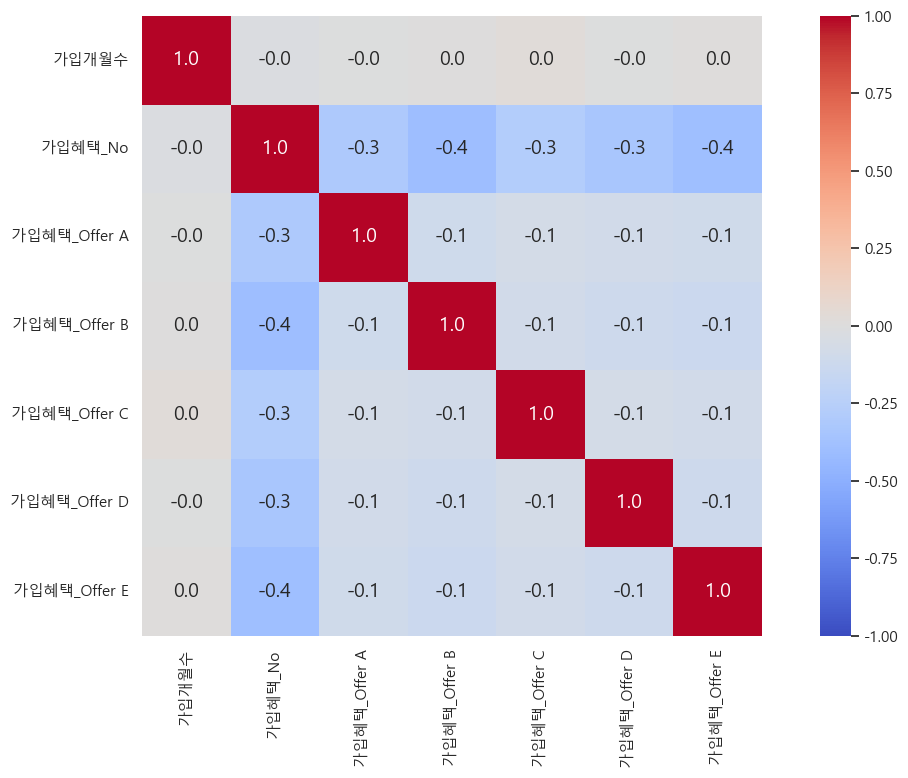

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_ser2, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- 가입혜택은 가입개월수와는 아무 상관을 보이지 않았다.

### 정리

- 계약기간유형이 월결제보다 2년 계약방식일 때 가입개월수가 길 가능성이 높았으며, 
- 친구추천여부, 친구추천횟수, 또한 프리미엄기술지원여부와도 양의 상관관계를 갖는 것을 알아내었다.

**→ 따라서 이탈률과 음의 상관관계를 갖는 가입개월수를 늘리기 위해서는,**  
  1) **계약기간유형**을 매달 결제 방식에서 **2년** 계약 방식을 권장하는 프로모션을 진행해야 한다.
  2) **친구추천횟수**에 따른 혜택을 제공해야 한다.
  4) **프리미엄기술**에 대해 알리고, 이를 발전시킬 수 있도록 한다.

---

# 계약기간유형

- 계약기간유형 변수는 Month-to-month, One year, Two year의 3개의 고유값을 가진 변수로, 각 유형이 원핫 인코딩하여 다른 변수들과 상관관계를 갖는지 알아보자.
- 계약기간유형_Month-to-month와 계약기간유형_Two Year는 각각 이탈여부와 각각 0.4, -0.3의 상관관계를 보이므로, 계약기간유형에서 Month-to-month 방식을 감소시키고, Two year 방식을 증가시킨다면 이탈 가능성이 줄어들 것이다.

In [29]:
contract = tel[['계약기간유형']]
contract = pd.get_dummies(contract)
contract

,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
0,True,False,False
1,False,True,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
7038,False,True,False
7039,False,True,False
7040,True,False,False
7041,True,False,False


In [30]:
contract['고객ID'] = tel['고객ID']
contract

,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year,고객ID
0,True,False,False,7590-VHVEG
1,False,True,False,5575-GNVDE
2,True,False,False,3668-QPYBK
3,False,True,False,7795-CFOCW
4,True,False,False,9237-HQITU
...,...,...,...,...
7038,False,True,False,6840-RESVB
7039,False,True,False,2234-XADUH
7040,True,False,False,4801-JZAZL
7041,True,False,False,8361-LTMKD


### 원래 데이터셋과의 비교

In [31]:
numeric_df = tel.select_dtypes(include=['number', 'bool'])

In [36]:
final_df = pd.concat([numeric_df, contract], axis=1)
final_df.drop('고객ID', axis=1, inplace=True)

In [37]:
correlation_matrix = final_df.corr()
correlation_matrix

,성별,고령자여부,배우자여부,부양가족여부,가입개월수,전화서비스가입여부,복수회선여부,온라인보안서비스여부,온라인백업서비스여부,기기보호서비스여부,...,영화스트리밍이용여부,전자청구서이용여부,월요금,총요금,이탈여부,인터넷서비스가입여부,개월수*월요금,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
성별,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.008414,-0.017021,-0.013773,-0.002105,...,-0.010487,-0.011754,-0.014569,-0.000080,-0.008612,-0.006026,-0.000029,-0.003386,0.008026,-0.003695
고령자여부,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.142948,-0.038653,0.066572,0.059428,...,0.120176,0.156530,0.220173,0.103006,0.150889,0.182742,0.103261,0.138360,-0.046262,-0.117000
배우자여부,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142057,0.143106,0.141498,0.153786,...,0.117412,-0.014877,0.096848,0.317504,-0.150448,-0.000615,0.317462,-0.280865,0.082783,0.248091
부양가족여부,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024526,0.080972,0.023671,0.013963,...,-0.039741,-0.111377,-0.113890,0.062078,-0.164221,-0.139812,0.062290,-0.231720,0.068368,0.204613
가입개월수,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.331941,0.327203,0.360277,0.360653,...,0.286111,0.006152,0.247900,0.826178,-0.352229,0.039062,0.826568,-0.645561,0.202570,0.558533
전화서비스가입여부,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,0.279690,-0.092893,-0.052312,-0.071227,...,-0.032959,0.016505,0.247398,0.113214,0.011942,-0.172209,0.113336,-0.000742,-0.002791,0.003519
복수회선여부,-0.008414,0.142948,0.142057,-0.024526,0.331941,0.279690,1.000000,0.098108,0.202237,0.201137,...,0.258751,0.163530,0.490434,0.468504,0.040102,0.210564,0.468748,-0.088203,-0.003794,0.106253
온라인보안서비스여부,-0.017021,-0.038653,0.143106,0.080972,0.327203,-0.092893,0.098108,1.000000,0.283832,0.275438,...,0.187398,-0.003636,0.296594,0.411651,-0.171226,0.333403,0.411816,-0.246679,0.100162,0.191773
온라인백업서비스여부,-0.013773,0.066572,0.141498,0.023671,0.360277,-0.052312,0.202237,0.283832,1.000000,0.303546,...,0.274501,0.126735,0.441780,0.509226,-0.082255,0.381593,0.509754,-0.164172,0.083722,0.111400
기기보호서비스여부,-0.002105,0.059428,0.153786,0.013963,0.360653,-0.071227,0.201137,0.275438,0.303546,1.000000,...,0.402111,0.103797,0.482692,0.521983,-0.066160,0.380754,0.521748,-0.225662,0.102495,0.165096


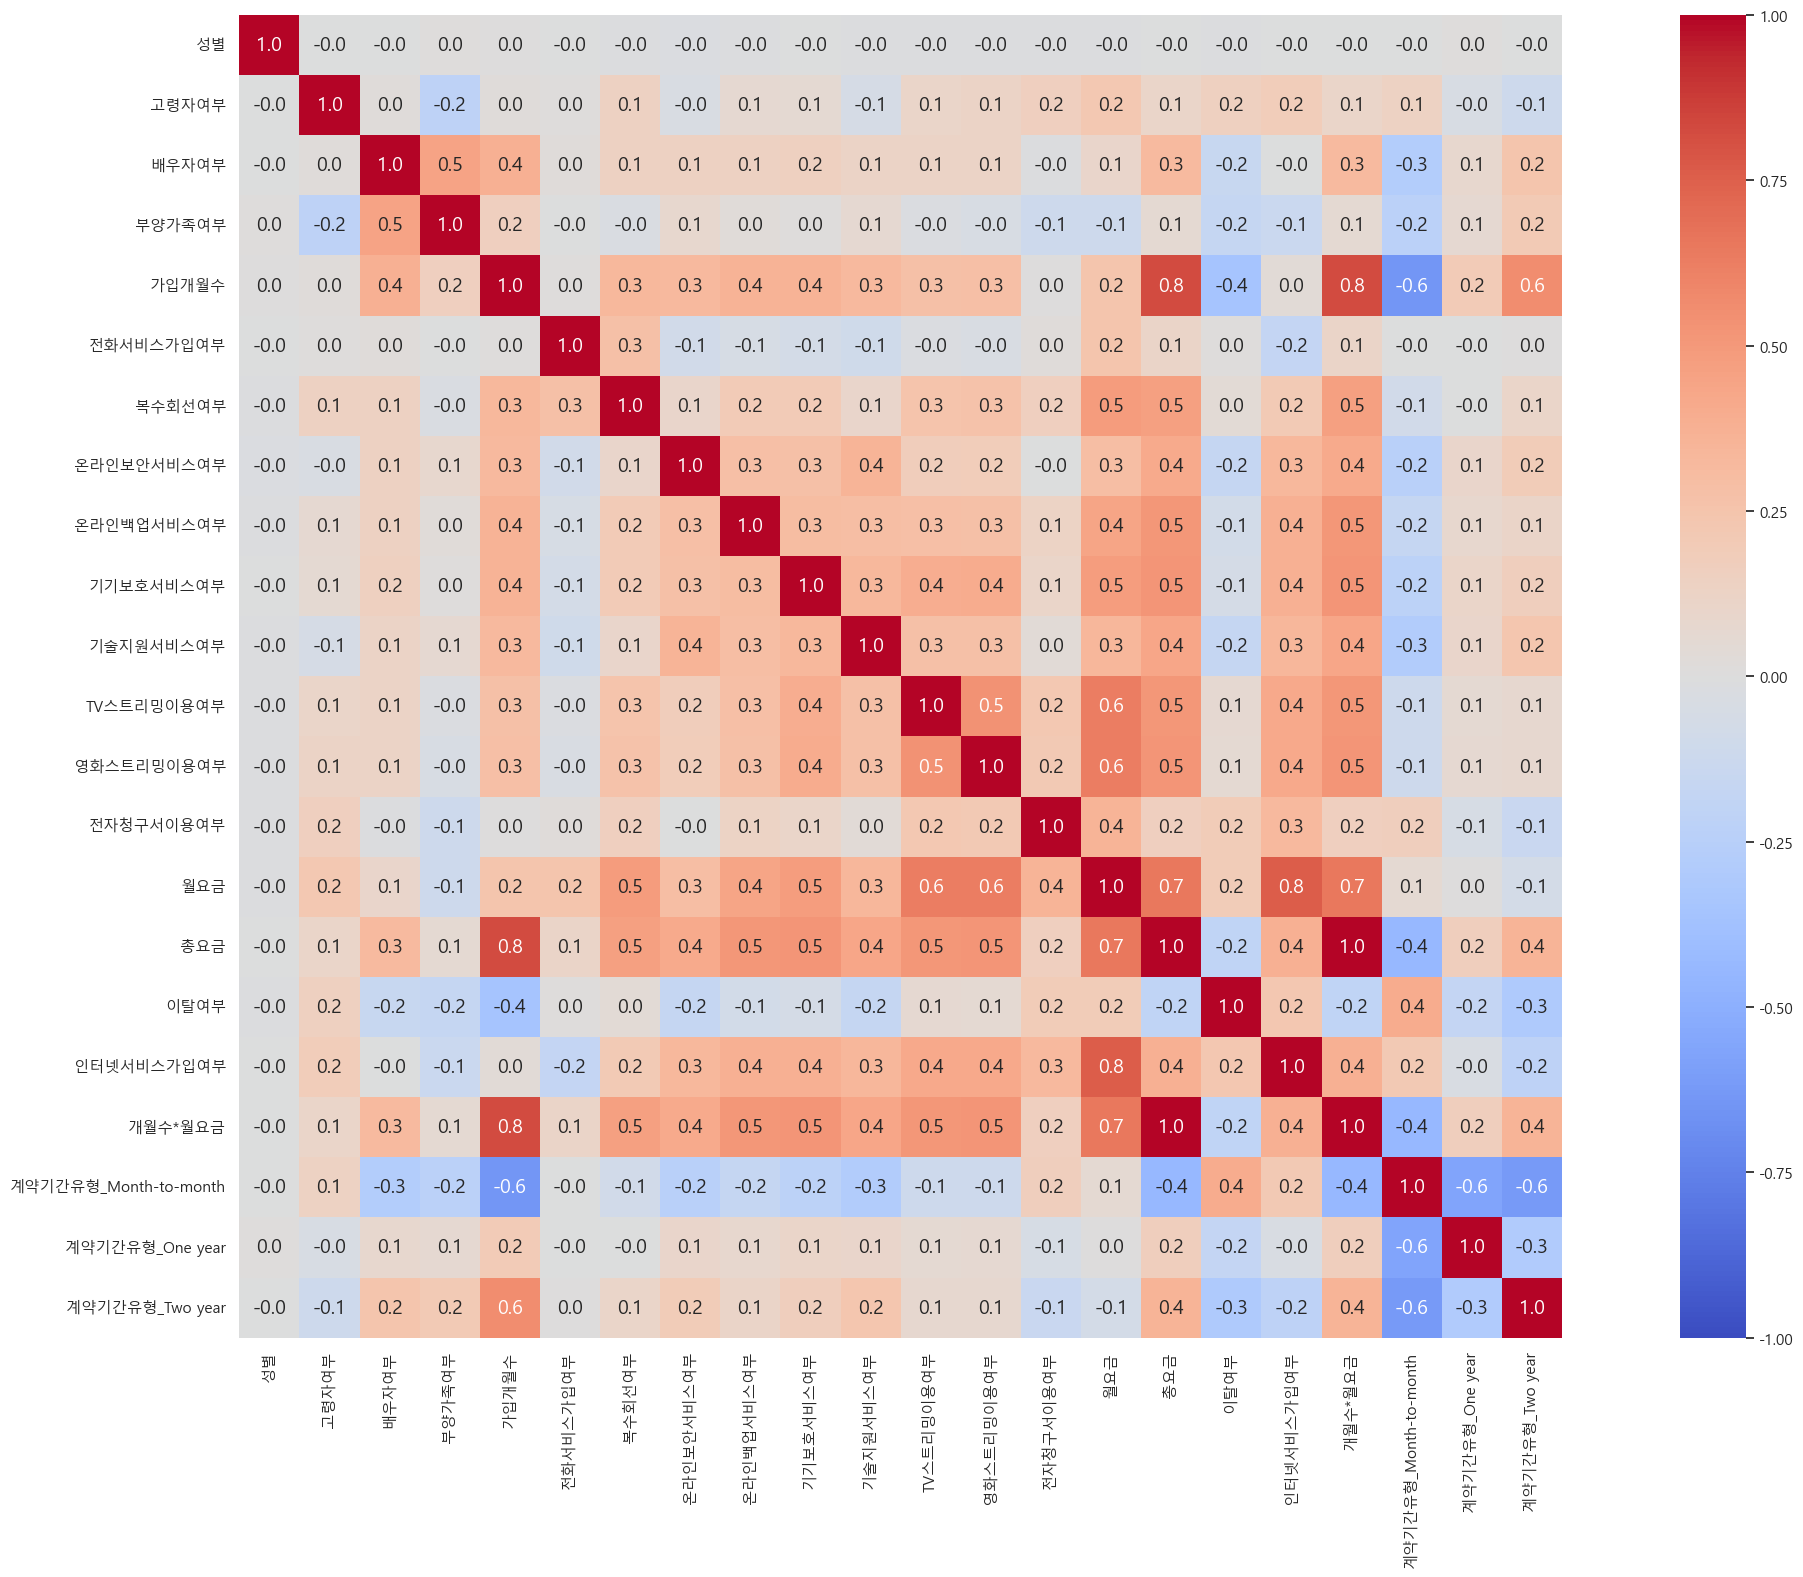

In [39]:
plt.figure(figsize=(24, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- **정리**
- 배우자여부와 월결제계약 사이에는 -0.3의 음의 상관관계가 관찰되었다.
배우자가 있는 고객일수록 월결제방식을 덜 선택한다는 것을 알 수 있다.
- 기술지원서비스여부와 월결제계약 사이에는 -0.3의 음의 상관관계가 관찰되었다.
기술지원서비스를 이용하는 고객일수록 월결제방식을 덜 선택한다는 것을 알 수 있다.
- 가입개월수와 월결제는 -0.6의 음의 상관관계를, 가입개월수와 2년 계약은 0.6의 양의 상관관계를 보인다.
아까 봤던 것과 같이, 가입개월수가 길수록 이탈률은 적어진다는 것을 추측할 수 있다.
총요금 역시 계약기간이 길어질수록 총요금이 증가하는 것이 관찰되었으나, 프로모션에 필요한 방향이라고 생각되지는 않는다.

### 추가 데이터셋과의 비교

In [40]:
contract2 = tel[['계약기간유형']]
contract2 = pd.get_dummies(contract2)
contract2

,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
0,True,False,False
1,False,True,False
2,True,False,False
3,False,True,False
4,True,False,False
...,...,...,...
7038,False,True,False
7039,False,True,False
7040,True,False,False
7041,True,False,False


In [41]:
contract2['고객ID'] = tel['고객ID']
contract2

,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year,고객ID
0,True,False,False,7590-VHVEG
1,False,True,False,5575-GNVDE
2,True,False,False,3668-QPYBK
3,False,True,False,7795-CFOCW
4,True,False,False,9237-HQITU
...,...,...,...,...
7038,False,True,False,6840-RESVB
7039,False,True,False,2234-XADUH
7040,True,False,False,4801-JZAZL
7041,True,False,False,8361-LTMKD


In [42]:
demo_stat

,고객ID,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,고객만족도점수,현재고객상태,이탈여부,고객생애가치,가입개월수
0,0002-ORFBO,False,37,False,False,True,False,0,3,Stayed,False,2205,9
1,0003-MKNFE,True,46,False,False,False,False,0,5,Stayed,False,5414,9
2,0004-TLHLJ,True,50,False,False,False,False,0,1,Churned,True,4479,4
3,0011-IGKFF,True,78,False,True,True,False,0,1,Churned,True,3714,13
4,0013-EXCHZ,False,75,False,True,True,False,0,1,Churned,True,3464,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,False,20,True,False,False,False,0,4,Stayed,False,3161,13
7039,9992-RRAMN,True,40,False,False,True,False,0,1,Churned,True,5248,22
7040,9992-UJOEL,True,22,True,False,False,False,0,5,Joined,False,5870,2
7041,9993-LHIEB,True,21,True,False,True,False,0,3,Stayed,False,4792,67


In [43]:
numeric_df = demo_stat.select_dtypes(include=['number', 'bool'])

In [44]:
numeric_df['고객ID'] = demo_stat['고객ID']

In [45]:
final_df2 = pd.merge(numeric_df, contract2, on='고객ID', how='outer', validate='one_to_one')

In [46]:
final_df2

,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,고객만족도점수,이탈여부,고객생애가치,가입개월수,고객ID,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
0,False,37,False,False,True,False,0,3,False,2205,9,0002-ORFBO,False,True,False
1,True,46,False,False,False,False,0,5,False,5414,9,0003-MKNFE,True,False,False
2,True,50,False,False,False,False,0,1,True,4479,4,0004-TLHLJ,True,False,False
3,True,78,False,True,True,False,0,1,True,3714,13,0011-IGKFF,True,False,False
4,False,75,False,True,True,False,0,1,True,3464,3,0013-EXCHZ,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,20,True,False,False,False,0,4,False,3161,13,9987-LUTYD,False,True,False
7039,True,40,False,False,True,False,0,1,True,5248,22,9992-RRAMN,True,False,False
7040,True,22,True,False,False,False,0,5,False,5870,2,9992-UJOEL,True,False,False
7041,True,21,True,False,True,False,0,3,False,4792,67,9993-LHIEB,False,False,True


In [47]:
final_df2.drop('고객ID', axis=1, inplace=True)

In [48]:
correlation_matrix2 = final_df2.corr()
correlation_matrix2

,성별,나이,30세미만여부,고령자여부,결혼여부,부양가족여부,부양가족수,고객만족도점수,이탈여부,고객생애가치,가입개월수,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
성별,1.000000,0.002186,-0.002962,-0.001874,-0.001808,0.005229,0.005840,-0.003948,-0.008612,-0.006851,0.005106,-0.003386,0.008026,-0.003695
나이,0.002186,1.000000,-0.672651,0.681507,-0.003666,-0.125450,-0.119000,-0.085170,0.115760,-0.001826,0.010202,0.094451,-0.042309,-0.069663
30세미만여부,-0.002962,-0.672651,1.000000,-0.219216,0.015140,0.041651,0.036340,0.041993,-0.054604,-0.008363,-0.000579,-0.038479,0.027102,0.018995
고령자여부,-0.001874,0.681507,-0.219216,1.000000,0.016479,-0.174396,-0.168152,-0.116601,0.150889,-0.003167,0.016567,0.138360,-0.046262,-0.117000
결혼여부,-0.001808,-0.003666,0.015140,0.016479,1.000000,0.363430,0.324205,0.077743,-0.150448,0.137859,0.379697,-0.280865,0.082783,0.248091
부양가족여부,0.005229,-0.125450,0.041651,-0.174396,0.363430,1.000000,0.888234,0.168359,-0.248542,0.058222,0.131376,-0.175496,0.014680,0.190262
부양가족수,0.005840,-0.119000,0.036340,-0.168152,0.324205,0.888234,1.000000,0.152873,-0.218780,0.049611,0.107689,-0.153324,0.015091,0.164068
고객만족도점수,-0.003948,-0.085170,0.041993,-0.116601,0.077743,0.168359,0.152873,1.000000,-0.754649,0.075811,0.210056,-0.283870,0.136334,0.200641
이탈여부,-0.008612,0.115760,-0.054604,0.150889,-0.150448,-0.248542,-0.218780,-0.754649,1.000000,-0.127463,-0.352229,0.405103,-0.177820,-0.302253
고객생애가치,-0.006851,-0.001826,-0.008363,-0.003167,0.137859,0.058222,0.049611,0.075811,-0.127463,1.000000,0.396406,-0.246430,0.056364,0.233151


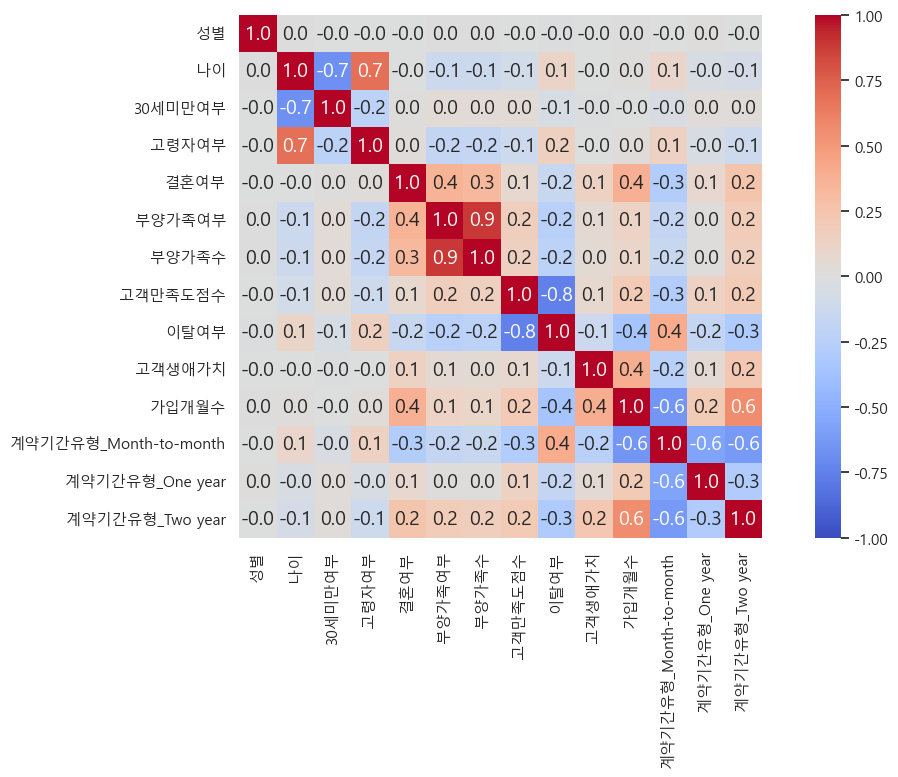

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix2, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

- demographics & status의 데이터셋의 변수들과 계약기간유형은 큰 상관을 보이지 않는다.

In [51]:
services

,고객ID,친구추천여부,친구추천횟수,가입혜택,전화서비스가입여부,장거리통화요금,월평균다운로드용량(GB),프리미엄기술지원여부,음악스트리밍이용여부,무제한데이터이용여부,전자청구서이용여부,총환불액,총초과데이터요금,총장거리통화요금,총납부금,가입개월수
0,8779-QRDMV,False,0,No,False,0.00,8,False,False,False,True,0.00,20,0.00,59.65,1
1,7495-OOKFY,True,1,Offer E,True,48.85,17,False,False,True,True,0.00,0,390.80,1024.10,8
2,1658-BYGOY,False,0,Offer D,True,11.33,52,False,True,True,True,45.61,0,203.94,1910.88,18
3,4598-XLKNJ,True,1,Offer C,True,19.76,12,False,False,True,True,13.43,0,494.00,2995.07,25
4,4846-WHAFZ,True,1,Offer C,True,6.33,14,False,False,True,True,0.00,0,234.21,3102.36,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,False,0,No,True,22.77,0,False,False,False,True,19.31,0,1639.44,3039.53,72
7039,6840-RESVB,True,1,Offer C,True,36.05,24,True,True,True,True,48.23,0,865.20,2807.47,24
7040,2234-XADUH,True,4,No,True,29.66,59,False,True,True,True,45.38,0,2135.52,9453.04,72
7041,4801-JZAZL,True,1,No,False,0.00,17,False,False,True,True,27.24,0,0.00,319.21,11


In [52]:
numeric_df = services.select_dtypes(include=['number', 'bool'])
numeric_df

,친구추천여부,친구추천횟수,전화서비스가입여부,장거리통화요금,월평균다운로드용량(GB),프리미엄기술지원여부,음악스트리밍이용여부,무제한데이터이용여부,전자청구서이용여부,총환불액,총초과데이터요금,총장거리통화요금,총납부금,가입개월수
0,False,0,False,0.00,8,False,False,False,True,0.00,20,0.00,59.65,1
1,True,1,True,48.85,17,False,False,True,True,0.00,0,390.80,1024.10,8
2,False,0,True,11.33,52,False,True,True,True,45.61,0,203.94,1910.88,18
3,True,1,True,19.76,12,False,False,True,True,13.43,0,494.00,2995.07,25
4,True,1,True,6.33,14,False,False,True,True,0.00,0,234.21,3102.36,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,0,True,22.77,0,False,False,False,True,19.31,0,1639.44,3039.53,72
7039,True,1,True,36.05,24,True,True,True,True,48.23,0,865.20,2807.47,24
7040,True,4,True,29.66,59,False,True,True,True,45.38,0,2135.52,9453.04,72
7041,True,1,False,0.00,17,False,False,True,True,27.24,0,0.00,319.21,11


In [54]:
numeric_df['고객ID'] = services['고객ID']
numeric_df

,친구추천여부,친구추천횟수,전화서비스가입여부,장거리통화요금,월평균다운로드용량(GB),프리미엄기술지원여부,음악스트리밍이용여부,무제한데이터이용여부,전자청구서이용여부,총환불액,총초과데이터요금,총장거리통화요금,총납부금,가입개월수,고객ID
0,False,0,False,0.00,8,False,False,False,True,0.00,20,0.00,59.65,1,8779-QRDMV
1,True,1,True,48.85,17,False,False,True,True,0.00,0,390.80,1024.10,8,7495-OOKFY
2,False,0,True,11.33,52,False,True,True,True,45.61,0,203.94,1910.88,18,1658-BYGOY
3,True,1,True,19.76,12,False,False,True,True,13.43,0,494.00,2995.07,25,4598-XLKNJ
4,True,1,True,6.33,14,False,False,True,True,0.00,0,234.21,3102.36,37,4846-WHAFZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,0,True,22.77,0,False,False,False,True,19.31,0,1639.44,3039.53,72,2569-WGERO
7039,True,1,True,36.05,24,True,True,True,True,48.23,0,865.20,2807.47,24,6840-RESVB
7040,True,4,True,29.66,59,False,True,True,True,45.38,0,2135.52,9453.04,72,2234-XADUH
7041,True,1,False,0.00,17,False,False,True,True,27.24,0,0.00,319.21,11,4801-JZAZL


In [60]:
offer = services[['가입혜택']]
offer = pd.get_dummies(offer)
offer

,가입혜택_No,가입혜택_Offer A,가입혜택_Offer B,가입혜택_Offer C,가입혜택_Offer D,가입혜택_Offer E
0,True,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,True,False
3,False,False,False,True,False,False
4,False,False,False,True,False,False
...,...,...,...,...,...,...
7038,True,False,False,False,False,False
7039,False,False,False,True,False,False
7040,True,False,False,False,False,False
7041,True,False,False,False,False,False


In [62]:
services_df = pd.concat([numeric_df, offer], axis=1)
services_df

,친구추천여부,친구추천횟수,전화서비스가입여부,장거리통화요금,월평균다운로드용량(GB),프리미엄기술지원여부,음악스트리밍이용여부,무제한데이터이용여부,전자청구서이용여부,총환불액,...,총장거리통화요금,총납부금,가입개월수,고객ID,가입혜택_No,가입혜택_Offer A,가입혜택_Offer B,가입혜택_Offer C,가입혜택_Offer D,가입혜택_Offer E
0,False,0,False,0.00,8,False,False,False,True,0.00,...,0.00,59.65,1,8779-QRDMV,True,False,False,False,False,False
1,True,1,True,48.85,17,False,False,True,True,0.00,...,390.80,1024.10,8,7495-OOKFY,False,False,False,False,False,True
2,False,0,True,11.33,52,False,True,True,True,45.61,...,203.94,1910.88,18,1658-BYGOY,False,False,False,False,True,False
3,True,1,True,19.76,12,False,False,True,True,13.43,...,494.00,2995.07,25,4598-XLKNJ,False,False,False,True,False,False
4,True,1,True,6.33,14,False,False,True,True,0.00,...,234.21,3102.36,37,4846-WHAFZ,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,0,True,22.77,0,False,False,False,True,19.31,...,1639.44,3039.53,72,2569-WGERO,True,False,False,False,False,False
7039,True,1,True,36.05,24,True,True,True,True,48.23,...,865.20,2807.47,24,6840-RESVB,False,False,False,True,False,False
7040,True,4,True,29.66,59,False,True,True,True,45.38,...,2135.52,9453.04,72,2234-XADUH,True,False,False,False,False,False
7041,True,1,False,0.00,17,False,False,True,True,27.24,...,0.00,319.21,11,4801-JZAZL,True,False,False,False,False,False


In [63]:
final_df3 = pd.merge(services_df, contract2, on='고객ID', how='outer', validate='one_to_one')
final_df3

,친구추천여부,친구추천횟수,전화서비스가입여부,장거리통화요금,월평균다운로드용량(GB),프리미엄기술지원여부,음악스트리밍이용여부,무제한데이터이용여부,전자청구서이용여부,총환불액,...,고객ID,가입혜택_No,가입혜택_Offer A,가입혜택_Offer B,가입혜택_Offer C,가입혜택_Offer D,가입혜택_Offer E,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
0,True,2,True,42.39,16,True,False,True,True,0.00,...,0002-ORFBO,True,False,False,False,False,False,False,True,False
1,False,0,True,10.69,10,False,True,False,False,38.33,...,0003-MKNFE,True,False,False,False,False,False,True,False,False
2,False,0,True,33.65,30,False,False,True,True,0.00,...,0004-TLHLJ,False,False,False,False,False,True,True,False,False
3,True,1,True,27.82,4,False,False,True,True,0.00,...,0011-IGKFF,False,False,False,False,True,False,True,False,False
4,True,3,True,7.38,11,True,False,True,True,0.00,...,0013-EXCHZ,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,0,True,46.68,59,True,True,True,False,0.00,...,9987-LUTYD,False,False,False,False,True,False,False,True,False
7039,True,1,True,16.20,17,False,True,True,True,0.00,...,9992-RRAMN,False,False,False,False,True,False,True,False,False
7040,False,0,True,18.62,51,False,False,True,True,0.00,...,9992-UJOEL,False,False,False,False,False,True,True,False,False
7041,True,5,True,2.12,58,True,True,True,False,0.00,...,9993-LHIEB,False,True,False,False,False,False,False,False,True


In [65]:
final_df3.drop('고객ID', axis=1, inplace=True)

In [66]:
correlation_matrix3 = final_df3.corr()
correlation_matrix3

,친구추천여부,친구추천횟수,전화서비스가입여부,장거리통화요금,월평균다운로드용량(GB),프리미엄기술지원여부,음악스트리밍이용여부,무제한데이터이용여부,전자청구서이용여부,총환불액,...,가입개월수,가입혜택_No,가입혜택_Offer A,가입혜택_Offer B,가입혜택_Offer C,가입혜택_Offer D,가입혜택_Offer E,계약기간유형_Month-to-month,계약기간유형_One year,계약기간유형_Two year
친구추천여부,1.000000,0.708291,0.015418,0.008702,0.055003,0.121772,0.089917,0.019014,-0.011095,0.038250,...,0.361127,-0.008956,0.163606,0.100234,-0.007083,-0.056473,-0.166849,-0.271965,0.079985,0.240395
친구추천횟수,0.708291,1.000000,0.009947,0.006336,0.038575,0.107725,0.051349,-0.005813,-0.044888,0.024756,...,0.326386,-0.015540,0.151263,0.099017,-0.007439,-0.055848,-0.145468,-0.272905,0.068742,0.252186
전화서비스가입여부,0.015418,0.009947,1.000000,0.486673,-0.102748,-0.096340,-0.039252,-0.122395,0.016505,0.006331,...,0.008448,-0.007312,0.007993,0.004169,-0.005737,0.022829,-0.015163,-0.000742,-0.002791,0.003519
장거리통화요금,0.008702,0.006336,0.486673,1.000000,-0.030455,-0.048217,0.008044,-0.053273,0.018673,-0.018644,...,0.014705,-0.012965,-0.007860,0.022941,-0.005032,0.012140,-0.003388,-0.010496,0.030718,-0.017009
월평균다운로드용량(GB),0.055003,0.038575,-0.102748,-0.030455,1.000000,0.223924,0.323998,0.395209,0.142999,0.002397,...,0.049408,-0.023880,0.038480,0.018397,0.021679,-0.030202,-0.002380,0.062538,0.009623,-0.081932
프리미엄기술지원여부,0.121772,0.107725,-0.096340,-0.048217,0.223924,1.000000,0.276157,0.251496,0.037880,0.034823,...,0.324221,-0.005139,0.169983,0.058263,0.004729,-0.057860,-0.143183,-0.285241,0.095775,0.240824
음악스트리밍이용여부,0.089917,0.051349,-0.039252,0.008044,0.323998,0.276157,1.000000,0.297011,0.167172,0.003212,...,0.238262,-0.021249,0.118487,0.073857,-0.018420,-0.048514,-0.082506,-0.119947,0.059637,0.082848
무제한데이터이용여부,0.019014,-0.005813,-0.122395,-0.053273,0.395209,0.251496,0.297011,1.000000,0.245215,0.011101,...,0.031469,-0.009136,0.020459,0.016824,0.010811,-0.032038,0.000625,0.158481,-0.030073,-0.155817
전자청구서이용여부,-0.011095,-0.044888,0.016505,0.018673,0.142999,0.037880,0.167172,0.245215,1.000000,0.003966,...,0.006152,-0.011055,0.002261,0.014393,0.006416,-0.011901,0.006596,0.169096,-0.051391,-0.147889
총환불액,0.038250,0.024756,0.006331,-0.018644,0.002397,0.034823,0.003212,0.011101,0.003966,1.000000,...,0.059137,0.028246,0.001645,0.004892,0.010928,-0.006733,-0.052626,-0.022614,0.005383,0.021195


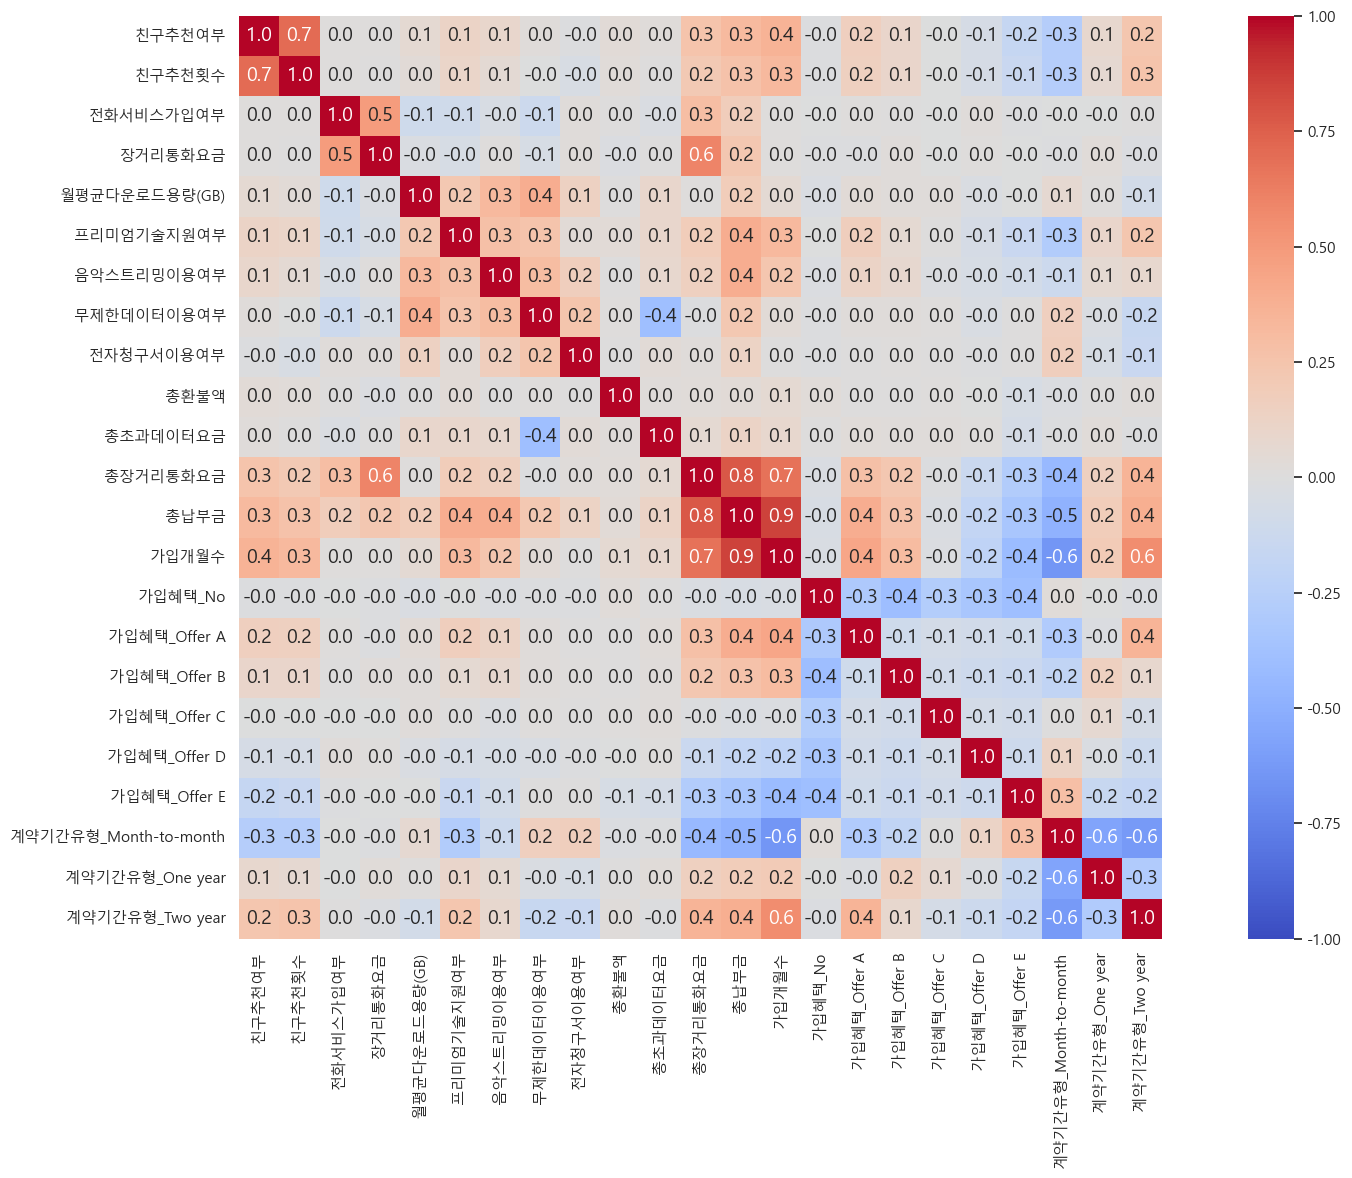

In [68]:
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix3, annot=True, fmt=".1f", cmap='coolwarm', square=True, vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

### 정리

이탈여부와 상관관계를 갖는 변수는 가입개월수, 계약기간유형 등이 있으며,  
가입개월수의 경우 계약기간을 월결제방식에서 2년결제방식으로 전환하면 가입개월수가 늘어날 가능성이 커지는 것을 발견하였다.  
따라서 계약기간을 길게 잡았을 때 할인을 더 많이 해주는 프로모션을 도입하면 이탈 가능성을 낮추는 데 유의미한 효과를 볼 수 있을 것이다.